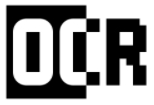

## **EasyOCR 実行手順**
1. メニューバーの「**ランタイム**」から「**すべてのセルを実行**」をクリック。
2. ライブラリインストール完了後、**[ファイル選択]**ボタンをクリックし、テキスト抽出したい画像ファイルを指定する。
3. OCR2TXT.txt（OCR結果を格納） 保存のダイヤログボックスが表示されるので、任意のローカルファイルに保存する。

## **ライブラリインストール＆インポート**

In [4]:
!pip install easyocr

     |████████████████████████████████| 47.6 MB 81.2 MB/s 


In [1]:
!npx degit JaidedAI/EasyOCR/examples -f

npx: installed 1 in 0.946s
> destination directory is not empty. Using --force, continuing
> cloned JaidedAI/EasyOCR#HEAD


In [11]:
import PIL
from PIL import ImageDraw
import easyocr
reader = easyocr.Reader(['ja','en'])
import warnings
warnings.filterwarnings('ignore')

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


## **デモ**

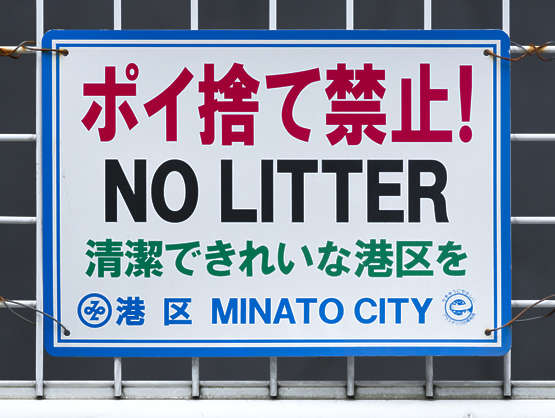

In [18]:
#@title 画像表示
im = PIL.Image.open("japanese.jpg")
im

In [46]:
#@title OCR結果（座標/OCR結果/確信度）表示する場合は#外す
bounds = reader.readtext('japanese.jpg')
#bounds

In [42]:
#@title OCR結果
reader.readtext('japanese.jpg', detail = 0)

['ポイ橋て禁止』', 'NOLTTB', '清潔できれいな港区を', '潜 区 MNATOCITY']

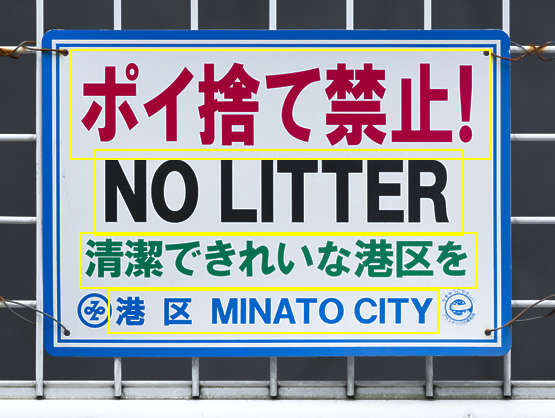

In [13]:
#@title OCR認識箇所表示
def draw_boxes(image, bounds, color='yellow', width=2):
   draw = ImageDraw.Draw(image)
   for bound in bounds:
       p0, p1, p2, p3 = bound[0]
       draw.line([*p0, *p1, *p2, *p3, *p0], fill=color, width=width)
   return image
draw_boxes(im, bounds)

## **ファイル選択 → OCR実行**

In [67]:
#@title ファイル選択
from google.colab import files
print('テキスト抽出するPDFを指定してください')
uploaded = files.upload()

#@title データフレーム格納＆欠損値削除
if len(uploaded.keys()) != 1:
    print("アップロードは１ファイルにのみ限ります")
else:
    target = list(uploaded.keys())[0]

テキスト抽出するPDFを指定してください


Saving picture_pc_d27ed96a427dba04558794a6a14d8ed6.png to picture_pc_d27ed96a427dba04558794a6a14d8ed6 (3).png


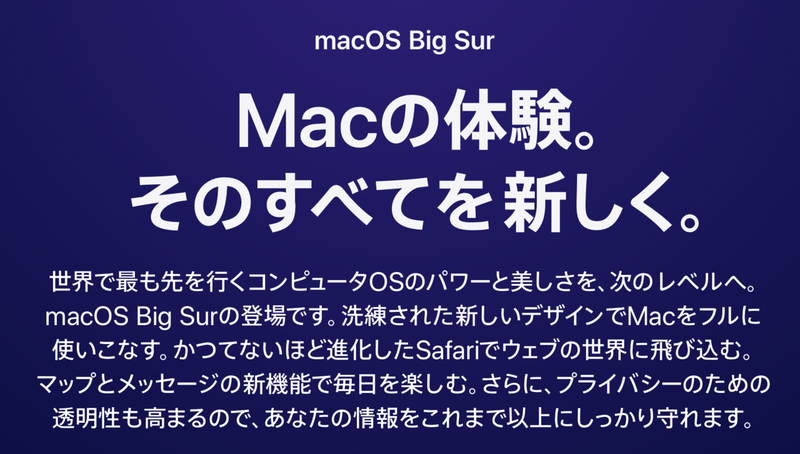

In [68]:
#@title 対象画像表示
im2 = PIL.Image.open(target)
im2

In [69]:
#@title OCR結果（座標/OCR結果/確信度）表示する場合は#外す
bounds = reader.readtext(target)
#bounds

In [70]:
#@title OCR結果
result = reader.readtext(target, detail = 0)
result

['macOS BigSur',
 'Macの体験。',
 'そのすべてを新しく。',
 '世界で最も先を行くコンピュータ0Sのパワーと美しさを 次のレベルヘ。',
 'macOS Big Surの登場です。 洗練された新しいデザインでMacをフルに',
 '使いこなす。かつてないほど進化したSafariでウェブの世界に飛び込む。',
 'マップとメッセージの新機能で毎日を楽しむ。さらにプライバシーのための',
 '透明性も高まるので あなたの情報をこれまで以上にしっかり守れます。']

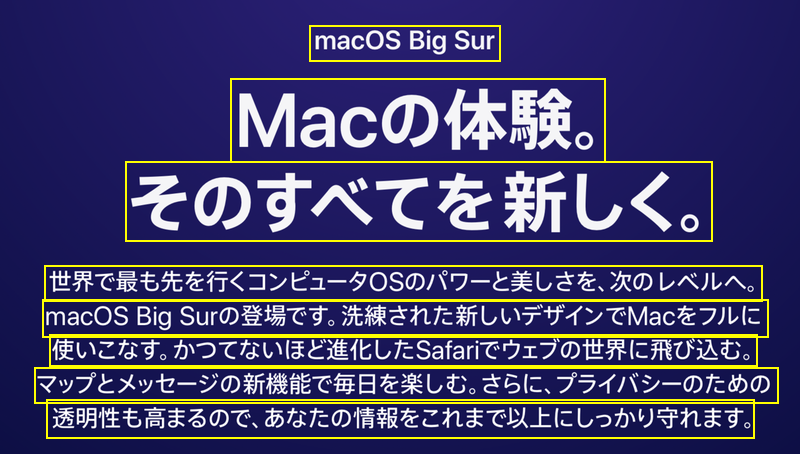

In [71]:
#@title OCR認識箇所表示
def draw_boxes(target, bounds, color='yellow', width=2):
   draw = ImageDraw.Draw(target)
   for bound in bounds:
       p0, p1, p2, p3 = bound[0]
       draw.line([*p0, *p1, *p2, *p3, *p0], fill=color, width=width)
   return target
draw_boxes(im2, bounds)

In [74]:
#@title OCR結果 → OCR2TXT.txt 出力
result = "\n".join(result)
from google.colab import files
with open('OCR2TXT.txt', 'w') as f:
    f.writelines(result)
files.download('OCR2TXT.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[**PythonでOCR - Easy OCR**](https://note.com/dngri/n/nd01dc96438a9)